# Handwritten Character Recognition - Preprocessing Pipeline

This notebook prepares the EMNIST dataset for model training by applying image correction, normalization, reshaping, label encoding, and dataset splitting.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
X, y = fetch_openml("EMNIST_balanced", version=1, return_X_y=True, as_frame=False)

EMNIST images are stored rotated and mirrored by default.

We define a function to:
- rotate images correctly
- fix horizontal mirroring

This correction is applied consistently to the entire dataset.

In [3]:
def fix_emnist(img):
    img = img.reshape(28,28)
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

In [4]:
X_images = np.array([fix_emnist(img) for img in X])

Pixel values range from 0 to 255.

We normalize them to the range 0 to 1 to:
- stabilize training
- speed up convergence
- make the data numerically suitable for ML models

In [5]:
X_images = X_images / 255.0
print("Normalized pixel range:", X_images.min(), "to", X_images.max())

Normalized pixel range: 0.0 to 1.0


Two representations are created:

- Flattened vectors for classical machine learning models
- 4D tensors for convolutional neural networks

This allows flexible experimentation without repeating preprocessing.

In [6]:
X_flat = X_images.reshape(len(X_images), -1)
print("Flattened shape:", X_flat.shape)
X_cnn = X_images.reshape(-1,28,28,1)
print("CNN shape:", X_cnn.shape)

Flattened shape: (131600, 784)
CNN shape: (131600, 28, 28, 1)


Machine learning algorithms require numeric class labels.

We encode the original labels into integer class indices and store the encoder for use during inference.

In [7]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original labels sample:", y[:10])
print("Encoded labels sample:", y_encoded[:10])

Original labels sample: ['45' '36' '43' '15' '4' '42' '26' '32' '20' '1']
Encoded labels sample: [40 30 38  7 34 37 19 26 13  1]


In [9]:
joblib.dump(le, "../models/label_encoder.pkl")

['../models/label_encoder.pkl']

The dataset is split into training and testing subsets.

Stratified splitting is used to preserve class distribution across both sets.

In [10]:
Xf_train, Xf_test, y_train, y_test = train_test_split(
    X_flat, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cnn, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Flat train:", Xf_train.shape, "Flat test:", Xf_test.shape)
print("CNN train:", Xc_train.shape, "CNN test:", Xc_test.shape)

Flat train: (105280, 784) Flat test: (26320, 784)
CNN train: (105280, 28, 28, 1) CNN test: (26320, 28, 28, 1)


Processed datasets and encoders are saved to disk.

This avoids repeated preprocessing and ensures consistency across notebooks and deployment code.

In [11]:
joblib.dump((Xf_train, Xf_test, y_train, y_test), "../datasets/processed_emnist_flat.pkl")
joblib.dump((Xc_train, Xc_test, yc_train, yc_test), "../datasets/processed_emnist_cnn.pkl")

print("Processed datasets saved.")

Processed datasets saved.


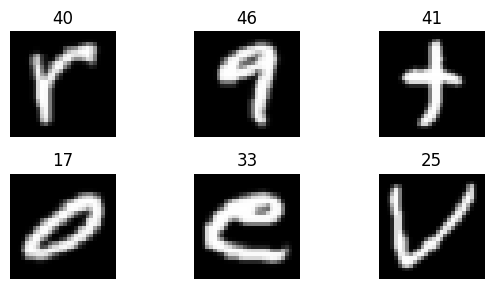

In [12]:
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Xc_train[i].reshape(28,28), cmap="gray")
    plt.title(yc_train[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

Conclusions:

- A complete preprocessing pipeline has been constructed.
- Data is now normalized, correctly oriented, encoded, and split.
- The processed datasets are saved and ready for modeling.

The next step is to build baseline models and evaluate their performance.
